#Setup and Imports

Image Data Processing Notebook
This notebook processes facial images for multimodal authentication system:
- Loads 3 facial expressions (neutral, smiling, surprised)
- Applies 6 augmentations per image
- Extracts deep learning features (VGG16) and color histograms
- Saves features to image_features.csv

In [1]:
import sys
sys.path.append('../scripts')

from image_processor import ImageProcessor
import warnings
warnings.filterwarnings('ignore')

print("✅ Imports successful!")
print("📂 Current working directory structure verified")


✅ Imports successful!
📂 Current working directory structure verified


#Initialize Processor

Initialize the Image Processor
This will load the VGG16 model for feature extraction

In [2]:
processor = ImageProcessor(
    original_dir='../images/original',
    augmented_dir='../images/augmented',
    output_dir='../outputs/plots'
)

print("✅ Image Processor initialized!")

Loading VGG16 model for feature extraction...


✓ VGG16 model loaded successfully

✅ Image Processor initialized!


#Verify Image Files
STEP 1: Verify that all required images exist
Required: neutral_1.jpg, smiling_1.jpg, surprised_1.jpg

In [3]:
if processor.verify_images_exist():
    print("\n✅ Ready to proceed with processing!")
else:
    print("\n❌ Please add your images to the images/original/ folder")

VERIFYING IMAGE FILES
✓ Found: neutral_1.jpg
✓ Found: smiling_1.jpg
✓ Found: surprised_1.jpg

✅ All images found!


✅ Ready to proceed with processing!


LOADING AND DISPLAYING ORIGINAL IMAGES
✓ Loaded neutral: neutral_1.jpg - Shape: (1080, 810, 3)
✓ Loaded smiling: smiling_1.jpg - Shape: (1080, 810, 3)
✓ Loaded surprised: surprised_1.jpg - Shape: (1080, 810, 3)

✓ Visualization saved: ..\outputs\plots\image_display.png


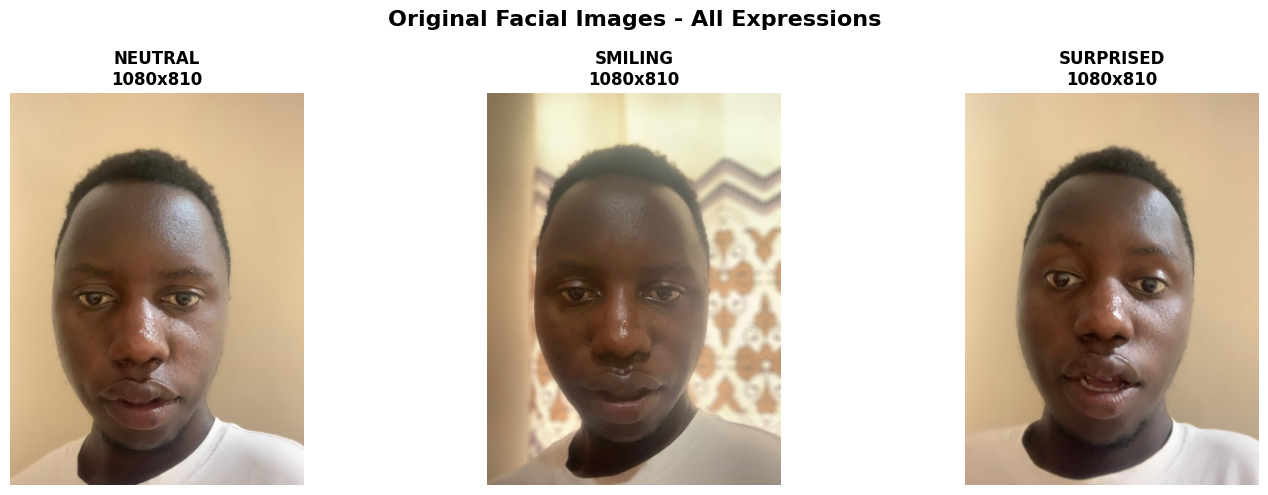



📊 Loaded 3 images successfully
   • neutral: (1080, 810, 3)
   • smiling: (1080, 810, 3)
   • surprised: (1080, 810, 3)


In [4]:
images = processor.load_and_display_images()

print(f"\n📊 Loaded {len(images)} images successfully")
for expr, img in images.items():
    print(f"   • {expr}: {img.shape}")


In [5]:
augmented_data = processor.apply_augmentations(images)

print(f"\n📊 Augmentation Statistics:")
print(f"   • Original images: {len(images)}")
print(f"   • Augmentations per image: 6")
print(f"   • Total images (original + augmented): {len(augmented_data)}")

APPLYING IMAGE AUGMENTATIONS
Augmentations being applied:
  1. Rotation (±15°)
  2. Horizontal Flip
  3. Brightness Adjustment (±20%)
  4. Grayscale Conversion
  5. Gaussian Noise
  6. Random Zoom (80-100%)

Processing neutral image...
  ✓ Applied: rotation
  ✓ Applied: horizontal_flip
  ✓ Applied: brightness
  ✓ Applied: grayscale
  ✓ Applied: gaussian_noise
  ✓ Applied: zoom
  ✓ Total for neutral: 1 original + 6 augmentations = 7 images

Processing smiling image...
  ✓ Applied: rotation
  ✓ Applied: horizontal_flip
  ✓ Applied: brightness
  ✓ Applied: grayscale
  ✓ Applied: gaussian_noise
  ✓ Applied: zoom
  ✓ Total for smiling: 1 original + 6 augmentations = 7 images

Processing surprised image...
  ✓ Applied: rotation
  ✓ Applied: horizontal_flip
  ✓ Applied: brightness
  ✓ Applied: grayscale
  ✓ Applied: gaussian_noise
  ✓ Applied: zoom
  ✓ Total for surprised: 1 original + 6 augmentations = 7 images

✅ Total augmented images created: 21
✓ Images saved to: ..\images\augmented/


📊

CREATING AUGMENTATION VISUALIZATION
✓ Augmentation visualization saved: ..\outputs\plots\image_augmentations.png


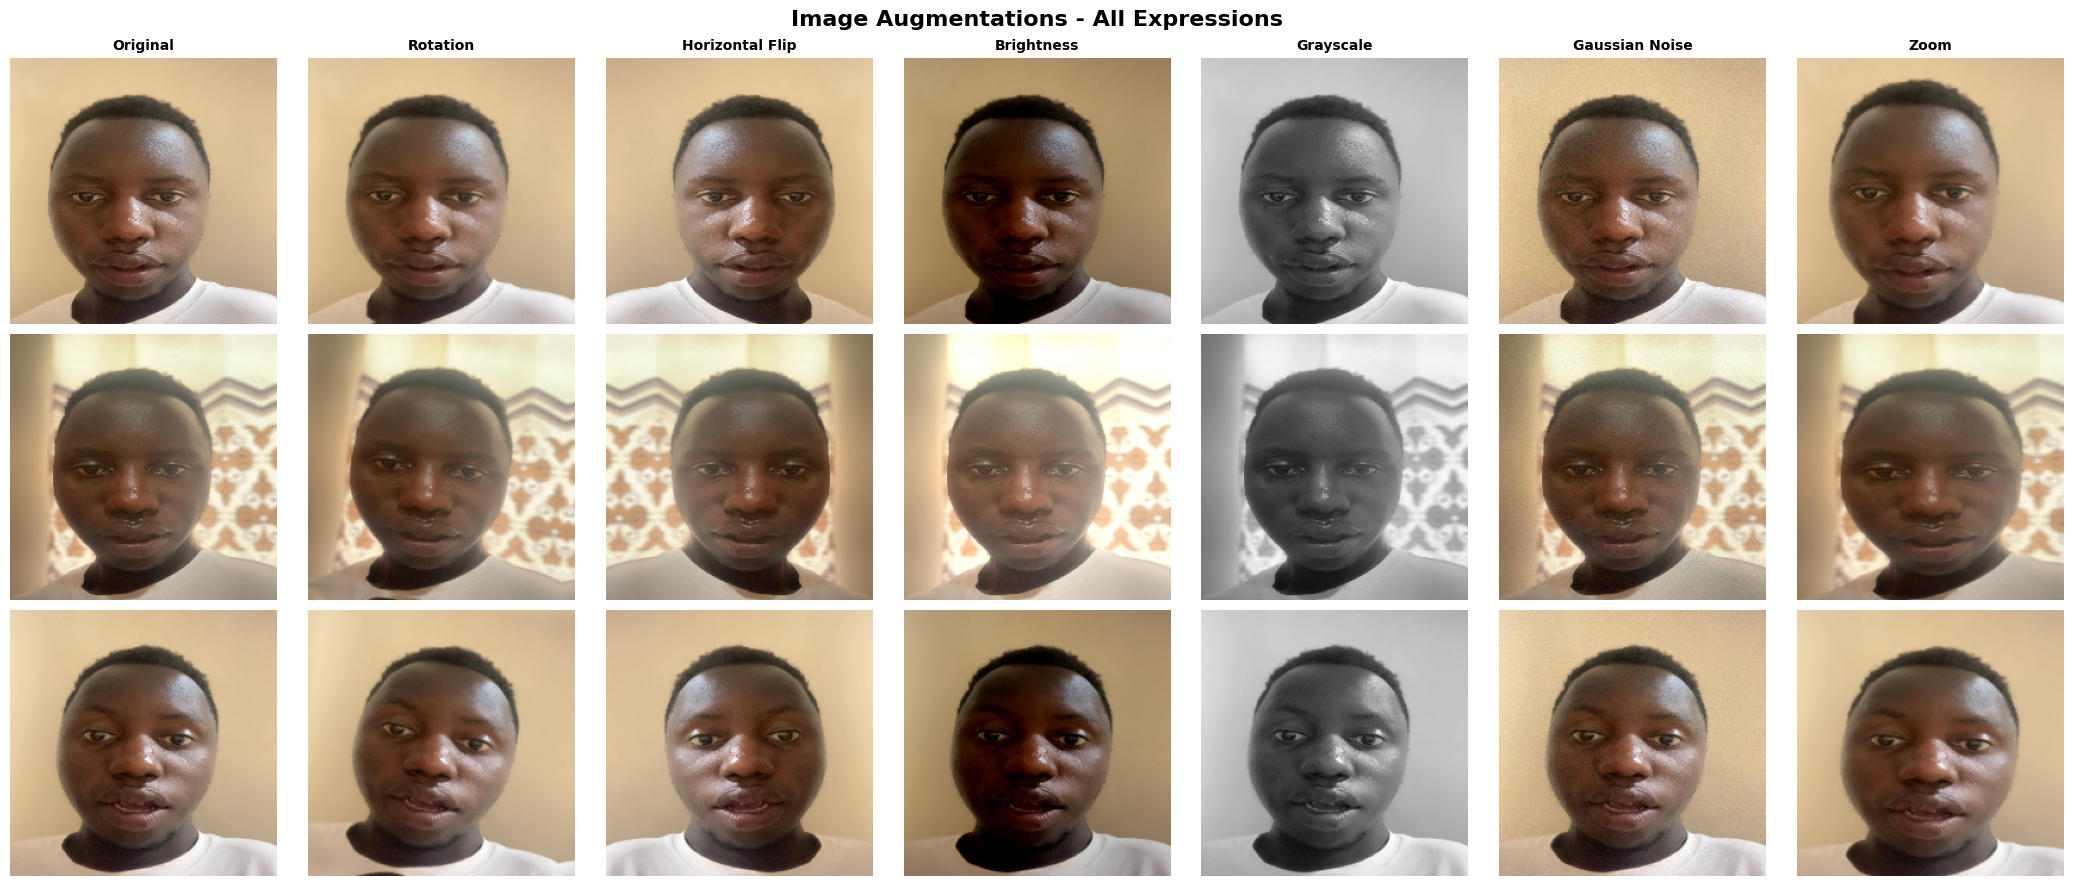


✅ Augmentation visualization complete!


In [6]:
processor.visualize_augmentations(augmented_data)

print("✅ Augmentation visualization complete!")

In [7]:
features_df = processor.extract_features(augmented_data)

print("\n📊 Feature Extraction Summary:")
print(features_df.info())
print(f"\n✅ Extracted {len(features_df.columns) - 6} features per image")

EXTRACTING IMAGE FEATURES
Features being extracted:
  1. VGG16 Deep Learning Embeddings (512 features)
  2. Color Histograms - Red channel (64 bins)
  3. Color Histograms - Green channel (64 bins)
  4. Color Histograms - Blue channel (64 bins)
  Total: 512 + 64 + 64 + 64 = 704 features per image

Processing 1/21: neutral_original
Processing 2/21: neutral_rotation
Processing 3/21: neutral_horizontal_flip
Processing 4/21: neutral_brightness
Processing 5/21: neutral_grayscale
Processing 6/21: neutral_gaussian_noise
Processing 7/21: neutral_zoom
Processing 8/21: smiling_original
Processing 9/21: smiling_rotation
Processing 10/21: smiling_horizontal_flip
Processing 11/21: smiling_brightness
Processing 12/21: smiling_grayscale
Processing 13/21: smiling_gaussian_noise
Processing 14/21: smiling_zoom
Processing 15/21: surprised_original
Processing 16/21: surprised_rotation
Processing 17/21: surprised_horizontal_flip
Processing 18/21: surprised_brightness
Processing 19/21: surprised_grayscale
Pr

In [8]:
print("🔍 First few rows of extracted features:")
display(features_df.head())

print("\n🔍 Feature columns breakdown:")
print(f"   • Metadata columns: 6")
print(f"   • VGG16 features: 512")
print(f"   • Histogram features: 192")
print(f"   • Total columns: {len(features_df.columns)}")


🔍 First few rows of extracted features:


,image_id,expression,augmentation,is_augmented,image_path,image_width,image_height,vgg16_feature_000,vgg16_feature_001,vgg16_feature_002,...,hist_blue_54,hist_blue_55,hist_blue_56,hist_blue_57,hist_blue_58,hist_blue_59,hist_blue_60,hist_blue_61,hist_blue_62,hist_blue_63
0,neutral_original,neutral,original,False,..\images\augmented\neutral_original.jpg,224,224,0.0,0.000000,0.000000,...,197.0,234.0,173.0,144.0,156.0,156.0,134.0,97.0,40.0,2.0
1,neutral_rotation,neutral,rotation,True,..\images\augmented\neutral_aug_rotation.jpg,224,224,0.0,0.000000,0.000000,...,207.0,228.0,157.0,167.0,148.0,161.0,132.0,111.0,23.0,2.0
2,neutral_horizontal_flip,neutral,horizontal_flip,True,..\images\augmented\neutral_aug_horizontal_fli...,224,224,0.0,0.000000,0.000000,...,197.0,234.0,173.0,144.0,156.0,156.0,134.0,97.0,40.0,2.0
3,neutral_brightness,neutral,brightness,True,..\images\augmented\neutral_aug_brightness.jpg,224,224,0.0,0.000000,0.115267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,neutral_grayscale,neutral,grayscale,True,..\images\augmented\neutral_aug_grayscale.jpg,224,224,0.0,0.620326,0.085314,...,195.0,182.0,267.0,209.0,175.0,153.0,108.0,86.0,33.0,14.0



🔍 Feature columns breakdown:
   • Metadata columns: 6
   • VGG16 features: 512
   • Histogram features: 192
   • Total columns: 711


In [9]:
output_path = processor.save_features(features_df, 
                                      output_path='../data/processed/image_features.csv')

print(f"✅ Features saved successfully to: {output_path}")


SAVING IMAGE FEATURES
✓ Features saved to: ..\data\processed\image_features.csv
✓ File size: 115.42 KB
✓ Total rows: 21
✓ Total columns: 711

📊 Feature Summary:
   - Metadata columns: 6
   - VGG16 embeddings: 512
   - Red histogram: 64
   - Green histogram: 64
   - Blue histogram: 64
   - Total features: 705

✅ IMAGE PROCESSING COMPLETE!

✅ Features saved successfully to: ..\data\processed\image_features.csv


In [10]:
print("=" * 70)
print("IMAGE PROCESSING COMPLETE - SUMMARY")
print("=" * 70)

print("\n✅ ALL REQUIREMENTS FULFILLED:")
print("   ✓ Submitted 3 facial images (neutral, smiling, surprised)")
print("   ✓ Loaded and displayed sample pictures")
print("   ✓ Applied augmentations (rotation, flipping, grayscale, etc.)")
print("   ✓ Extracted features (embeddings and histograms)")
print("   ✓ Saved features into image_features.csv")

print("\n📂 OUTPUT FILES:")
print(f"   • CSV: ../data/processed/image_features.csv")
print(f"   • Visualizations: ../outputs/plots/")
print(f"   • Augmented Images: ../images/augmented/")

print("\n📊 FINAL STATISTICS:")
print(f"   • Total images processed: {len(features_df)}")
print(f"   • Features per image: {len(features_df.columns) - 6}")
print(f"   • CSV file size: {output_path.stat().st_size / 1024:.2f} KB")

print("\n" + "=" * 70)
print("✅ Ready for team integration and model training!")
print("=" * 70)

IMAGE PROCESSING COMPLETE - SUMMARY

✅ ALL REQUIREMENTS FULFILLED:
   ✓ Submitted 3 facial images (neutral, smiling, surprised)
   ✓ Loaded and displayed sample pictures
   ✓ Applied augmentations (rotation, flipping, grayscale, etc.)
   ✓ Extracted features (embeddings and histograms)
   ✓ Saved features into image_features.csv

📂 OUTPUT FILES:
   • CSV: ../data/processed/image_features.csv
   • Visualizations: ../outputs/plots/
   • Augmented Images: ../images/augmented/

📊 FINAL STATISTICS:
   • Total images processed: 21
   • Features per image: 705
   • CSV file size: 115.42 KB

✅ Ready for team integration and model training!
